# HW 5: Linear Regression

In this assignment, we will perform linear regression analyses on both synthetic and real datasets, which will help you better understand the idea behind the regression analysis. 

## Submission instruction
- Due by 11:59pm on **Oct. 31st, 2019**
- Complete this notebook and name it as "*CSCI3360\_HW5\_{your first name}.ipynb*".
- Do **not** use any other 3rd party libraries unless you are asked to do so.
- Do **not** _hardcode_ any data.
- Feel free to modify function prototype (i.e., you can add additional input parameters or remove existing ones based on your needs)
- Feel free to define your own functions if needed.
- Label your graphs.
- All the texts and labels in your graphs should be _legible_.

Let's start by importing required libraries.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Simple Regression
As a warm-up, let's start by reviewing simple linear regression. In simple linear regression, we have $Y = \beta_0 + \beta_1 X$, where $X$ is an explanatory variable and $Y$ is a response variable. In class, we derived the **least squares** estimates for $\beta_0$ and $\beta_1$ by solving the following minimization problem:
$$
b_0^*, b_1^* = \underset{b_0, b_1}{\arg\,\min} \frac{1}{n}\sum_{i=1}^n (y_i - (b_0 + b_1x_i))^2
$$
Look at my lecture slides, and recall the equations for the solution $b_0^*$ and $b_1^*$.

Let's generate a random dataset $\{(x_i, y_i)\}_{i=1}^n$ in which $X$ and $Y$ truly has a linear relationship. For your convenience, the code for generating a random 1D dataset is provided below.

In [0]:
def generate_random_data_1d(n=1000, i_slope=None, i_bias=None, verbose=False):
    """
    generate a random dataset for simple regression
    
    Parameters:
    ----------------
    n: int, number of observations to generate
    i_slope, i_bias: float, the slope and bias of regression function
    verbose: boolean, if `True`, it prints messages
    
    Returns:
    (X, Y): a dataset, both X and Y are 1D numpy arrays
    """
    slope = np.random.rand() * 3 if i_slope is None else i_slope
    bias = np.random.rand() * 3 if i_slope is None else i_bias
        
    noise = np.random.randn(n) * 2.0
    x = np.linspace(0, 10, n)
    y = slope * x + bias + noise
    
    if verbose:
        print("Generated {0:d} points from Y={1:.2f}X + {2:.2f} + noise".format(n, slope, bias))
    
    return x, y

Let's generate a random dataset in which $X$ and $Y$ has a linear relationship: $Y = 0.9X - 0.2$.

In [0]:
# training data
lin_X, lin_Y = generate_random_data_1d(n=50, i_slope=0.9, i_bias=-0.2)

Given the training data, we can solve the simple regression problem using the equations we derived in class.

### Q1. Solve the simple regression problem.
- Implement `solve_simple_regression()` function which computes regression coefficients $\beta_0$ and $\beta_1$.
- Visualize both data and the *fitted line* in a single graph.
    - Implement `display_fitted_line()` function
    - You should clearly label axes and lines.
    - Use the font size of 15 for your axis/legend labels.

In [0]:
def solve_simple_regression(X, Y):
    """
    This function solves a simple regression problem and returns
    the estimated slope and bias.
    
    Parameters:
    -----------------
    X, Y: 1d numpy array, input data
    
    Returns:
    -----------------
    b0, b1: float, estimated slope and bias
    """
    
    #-------------------------#

    num = 0
    denom = 0

    for i in range(len(X)):
        num += ((X[i] - np.mean(X)) * (Y[i] - np.mean(Y)))
        denom += ((X[i] - np.mean(X))**2)

    b1 = num / denom
    b0 = np.mean(Y) - (b1 * np.mean(X))
    
    #-------------------------#
    
    
    return b0, b1

In [0]:
def display_fitted_line(X, Y, b0, b1):
    """
    This function plots your data along with the fitted line.
    
    Parameters:
    ------------------
    X, Y: 1d numpy arrays, input data
    b0: float, bias of the fitted line
    b1: float, slope of the fitted line
    
    Returns:
    ------------------
    None
    """
    
    #-------------------------#
    
    plt.rcParams.update({'font.size': 15})
    plt.scatter(X,Y)
    x = np.linspace(0, 10, 1000)
    y = b1*x + b0
    
    plt.plot(x,y)
    plt.title('Simple Regression Using Random Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
    #-------------------------#
    

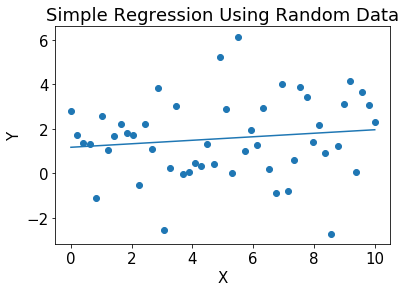

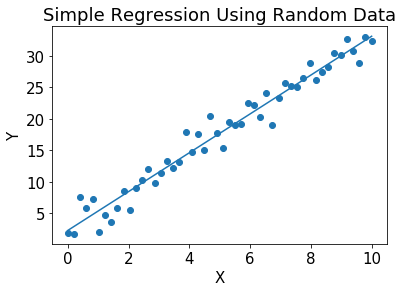

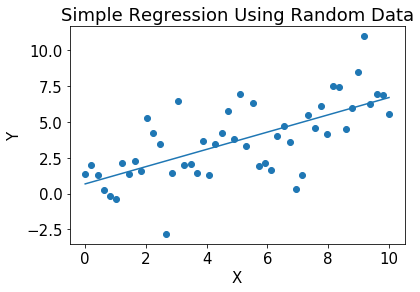

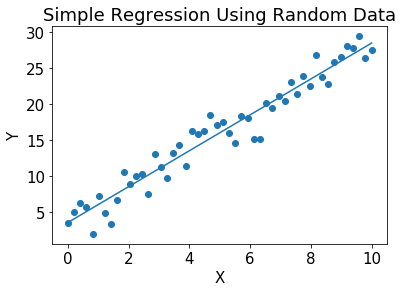

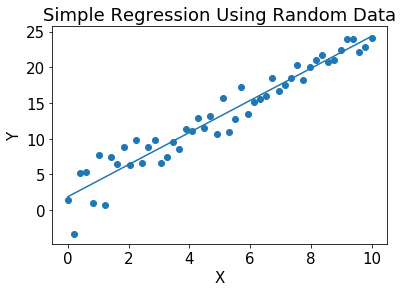

In [6]:
# code for testing your implementation
n_sample = 50

for i in range(5):
    train_X, train_Y = generate_random_data_1d(n_sample)
    b0, b1 = solve_simple_regression(train_X, train_Y)
    display_fitted_line(train_X, train_Y, b0, b1)

### Q2. Draw the residual plot for your fitted model, that is, plot the residuals ($Y-\hat{Y}$) against your feature ($X$).

Text(0, 0.5, 'Residuals')

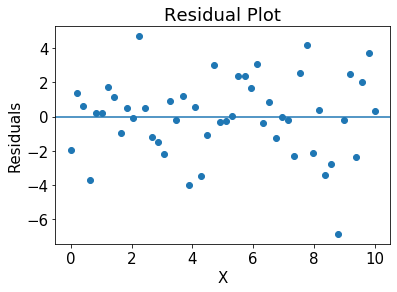

In [7]:
#-------------------------#
#  Your code goes here.   #
#-------------------------#

train_X, train_Y = generate_random_data_1d(n_sample)
b0, b1 = solve_simple_regression(train_X, train_Y)
y = (b1 * train_X) + b0
residual = train_Y - y
plt.scatter(train_X,residual)
plt.title('Residual Plot')
plt.axhline(y=0)
plt.xlabel('X')
plt.ylabel('Residuals')

## Sampling Distribution
Now, we will estimate the **sampling distribution** of $\hat{b}_0$ and $\hat{b}_1$ by repeatedly  drawing samples.

### Q3. Visualize the (simulated) sampling distributions for both $\hat{b}_0$ and $\hat{b}_1$.
1. Draw a sample $S$ of size 50. This is done by calling `generate_random_data_1d(n=50, i_slop=true_slope, i_bias=true_bias)`
2. Estimate $\hat{b}_0$ and $\hat{b}_1$. You already have implemented this.
3. Repeat STEP 1 and 2 5,000 times. Now you have 5,000 estimates for both $\beta_0$ and $\beta_1$.
4. Draw the histograms of $\hat{b}_0$ and $\hat{b}_1$. To draw the histograms, refer to [this page](https://matplotlib.org/3.1.0/gallery/statistics/hist.html). When calling `hist()` function, set `bins=50` and `density=True`. To understand the meaning of these to parameters, read [this page](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html). <font color='red'>Label each axis and set the title for each graph.</font>

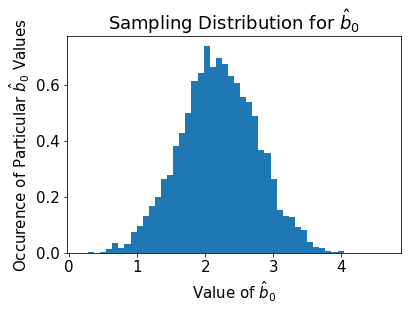

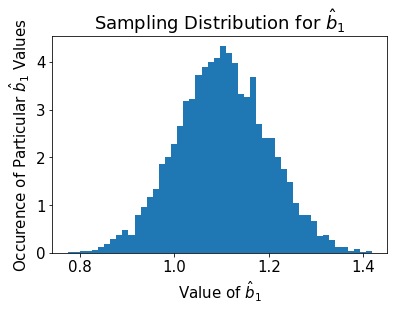

In [8]:
# use these two values when you generate samples
true_slope = 1.1
true_bias = 2.2

#-----------------------------#

x,y,b0,b1 = [],[],[],[]

for i in range(5000):
    x.append(0)
    y.append(0)
    b0.append(0)
    b1.append(0)
    x[i],y[i] = generate_random_data_1d(n=50, i_slope=true_slope, i_bias=true_bias)
    b0[i],b1[i] = solve_simple_regression(x[i], y[i])
    
plt.hist(b0, bins=50, density=True)
plt.title('Sampling Distribution for $\hat{b}_0$')
plt.xlabel('Value of $\hat{b}_0$')
plt.ylabel('Occurence of Particular $\hat{b}_0$ Values')
plt.show()

plt.hist(b1, bins=50, density=True)
plt.title('Sampling Distribution for $\hat{b}_1$')
plt.xlabel('Value of $\hat{b}_1$')
plt.ylabel('Occurence of Particular $\hat{b}_1$ Values')
plt.show()

#-----------------------------#




## Multiple Regression

For this part, we will use **automobile dataset** on UCI machine learning repository. This [web page](https://archive.ics.uci.edu/ml/datasets/Automobile) provides a detailed information about the dataset and contains a link to download. Note that the data file has an extension of .data but it is actually a **csv** file (you can check the contents by simply openning the file using a text editor).
- Use the last attribute, i.e., price, as your response variable.

### EDA 
Let us analyze the data and identify the relationship each feature has with the dependent variable $Y$. 

### Q4. Visualize this relationship between each feature and the response variable. 
- Load the dataset into a `DataFrame`.
- For each feature $X_i$ in your dataset, draw a scatter plot if $X_i$ is continuous. If $X_i$ is discrete, draw vertical boxplots of $Y$ using distinct categories in your dataset. In other words, $x$-axis represents distinct categories, while $y$-axis shows the distribution of $Y$. For example, _fuel_type_ is a categorical variable in your dataset with two categories, diesel and gas. Your graph will have two vertical boxplots side by side.
- Analyze the plots and tell which variable has the highest correlation with your response variable.
- Indicate the sample means of $X_i$ and $Y$ using a vertical and horizontal lines, respectively.



In [9]:
#-----------------------------#
#  Your code goes here        #
#-----------------------------#
columns = ["symbolizing","normalized-losses", "make", "fuel-type", "aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length",'width','height',"curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore",'stroke',"compression-ratio",'horsepower','peak-rpm','city-mpg','highway-mpg','price']

autoData = pd.read_csv("imports-85.csv", index_col=False, header = None)
autoData.columns = columns 

for x in columns:
    autoData = autoData[autoData[x] != '?']
    
autoData["price"] = autoData["price"].astype(int)
price_mean = autoData['price'].mean()

autoData["symbolizing"] = autoData["symbolizing"].astype(int)
autoData.boxplot(column = "price", by = "symbolizing")

autoData["normalized-losses"] = autoData["normalized-losses"].astype(int)
autoData.plot.scatter("normalized-losses", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['normalized-losses'].mean())

autoData.boxplot(column = "price", by = "make", figsize = (30,10))

autoData.boxplot(column = "price", by = "fuel-type")

autoData.boxplot(column = "price", by = "aspiration")

autoData.boxplot(column = "price", by = "num-of-doors")

autoData.boxplot(column = "price", by = "body-style")

autoData.boxplot(column = "price", by = "drive-wheels")

autoData.boxplot(column = "price", by = "engine-location")

autoData["wheel-base"] = autoData["wheel-base"].astype(float)
autoData.plot.scatter("wheel-base", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['wheel-base'].mean())

autoData["length"] = autoData["length"].astype(float)
autoData.plot.scatter("length", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['length'].mean())

autoData["width"] = autoData["width"].astype(float)
autoData.plot.scatter("width", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['width'].mean())

autoData["height"] = autoData["height"].astype(float)
autoData.plot.scatter("height", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['height'].mean())

autoData["curb-weight"] = autoData["curb-weight"].astype(float)
autoData.plot.scatter("curb-weight", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['curb-weight'].mean())

autoData.boxplot(column = "price", by = "engine-type")

autoData.boxplot(column = "price", by = "num-of-cylinders")

autoData["engine-size"] = autoData["engine-size"].astype(int)
autoData.plot.scatter("engine-size", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['engine-size'].mean())


autoData.boxplot(column = "price", by = "fuel-system")

autoData["bore"] = autoData["bore"].astype(float)
autoData.plot.scatter("bore", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['bore'].mean())

autoData["stroke"] = autoData["stroke"].astype(float)
autoData.plot.scatter("stroke", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['stroke'].mean())

autoData["compression-ratio"] = autoData["compression-ratio"].astype(int)
autoData.plot.scatter("compression-ratio", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['compression-ratio'].mean())

autoData["horsepower"] = autoData["horsepower"].astype(int)
autoData.plot.scatter("horsepower", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['horsepower'].mean())

autoData["peak-rpm"] = autoData["peak-rpm"].astype(int)
autoData.plot.scatter("peak-rpm", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['peak-rpm'].mean())

autoData["city-mpg"] = autoData["city-mpg"].astype(int)
autoData.plot.scatter("city-mpg", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['city-mpg'].mean())

autoData["highway-mpg"] = autoData["highway-mpg"].astype(int)
autoData.plot.scatter("highway-mpg", "price")
plt.axhline(y=price_mean)
plt.axvline(x=autoData['highway-mpg'].mean())




FileNotFoundError: ignored

One task you are supposed to do during your EDA is to identify variables/features that are strongly correlated to each other or have no relation with the response variable. This is useful in modeling of linear regression as it allows us to remove highly correlated features or features having no relation with the dependent variable.

The [`pandas.DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) function computes pairwise correlation coefficient between features. The `corr()` fucntion returns a DataFrame but you can view it as a $(p+1)\times (p+1)$ matrix, where $p$ is the number of variables in your dataset and $Y=X_{p+1}$. The entry at $i$-th row and $j$-th column is the correlation coefficient between $X_i$ and $X_j$.

### Q5. Draw a heatmap of correlation matrix.
- To draw a heatmap of your data, you can use `seaborn.heatmap()` function. See the documentation page [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html) and the examples therein.


In [0]:
import seaborn as sns

  sns.heatmap(autoData.corr())
#-----------------------------#
#  Your code goes here        #
#-----------------------------#



### Q6. Load the dataset and preprocess the data for your regression analysis.
1. Load the automobile dataset into a dataframe. 
2. Remove those instances with any missing values 
3. Categorical features need to be converted into numerical values. 

    Consider _drive\_wheels_ variable in your data. It is a categorical variable with 3 distinct values: 4wd, fwd, rwd. One way to convert the categorical data into numerical is to use **one-hot** encoding. The one-hot encoding creates a new binary variable for each distinct value in your variable, where the binary variable will take a value of 1 if the observations falls into the category represented by the variable. Let's take an example. Suppose you have 4 observations.

| drive_wheels |
|:------------:|
|  4wd         |
|  fwd         |
|  rwd         |
|  4wd         |

With one-hot encoding, this will be converted into 

| is_4wd | is_fwd | is_rwd |
|:------:|:------:|:------:|
|   1    |   0    |   0    |
|   0    |    1   |    0   |
|   0    |   0    |    1   |
|   1    |    0   |    0   |.

Notice that a categorical variable with 3 distinct values is represented by a binary vector of length 3.
- One-hot encoding is already implemented in `pandas.get_dummies()` function (see the documentation page [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)), but **you are supposed to implement this without using the `get_dummies()` function**.

In [0]:
# perform the pre-processing!


#-----------------------------#
#  Your code goes here        #
#-----------------------------#
# perform the pre-processing!
columns = ["symbolizing","normalized-losses", "make", "fuel-type", "aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length",'width','height',"curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore",'stroke',"compression-ratio",'horsepower','peak-rpm','city-mpg','highway-mpg','price']

autoData = pd.read_csv("imports-85.csv", index_col=False, header = None)
autoData.columns = columns 
for x in columns:
    autoData = autoData[autoData[x] != '?']
    

symbol_onehot = pd.get_dummies(autoData["symbolizing"])

make_onehot = pd.get_dummies(autoData["make"])

fuel_onehot = pd.get_dummies(autoData["fuel-type"])

aspiration_onehot = pd.get_dummies(autoData["aspiration"])

doors_onehot = pd.get_dummies(autoData["num-of-doors"])

body_onehot = pd.get_dummies(autoData["body-style"])

drive_onehot = pd.get_dummies(autoData["drive-wheels"])

engine_onehot = pd.get_dummies(autoData["engine-location"])

enginetype_onehot = pd.get_dummies(autoData["engine-type"])

cyllinder_onehot = pd.get_dummies(autoData["num-of-cylinders"])

fuelsystem_onehot = pd.get_dummies(autoData["fuel-system"])


autoData = autoData.drop(["symbolizing"], axis = 1)

autoData =autoData.drop(["make"], axis = 1)


autoData =autoData.drop(["fuel-type"], axis = 1)

autoData =autoData.drop(["aspiration"], axis = 1)


autoData =autoData.drop(["num-of-doors"], axis = 1)

autoData =autoData.drop(["body-style"], axis = 1)


autoData =autoData.drop(["drive-wheels"], axis = 1)

autoData =autoData.drop(["engine-location"], axis = 1)


autoData =autoData.drop(["engine-type"], axis = 1)

autoData =autoData.drop(["num-of-cylinders"], axis = 1)

autoData =autoData.drop(["fuel-system"], axis = 1)



one_hot_df = pd.concat([symbol_onehot,make_onehot ,fuel_onehot,aspiration_onehot,doors_onehot,body_onehot,drive_onehot,engine_onehot,enginetype_onehot,cyllinder_onehot,fuelsystem_onehot,autoData], axis=1)

print(one_hot_df.head())


### Q7. Using `sklearn` pacakge, build a linear regression model on the automobile dataset and visualize the results.
- Split the given dataset into _train_ and _test_ datasets.
    - Use 80% of observations for training and the remaining 20% for testing
    - To split your dataset into train and test set, you can use `sklearn.model_selection.train_test_split()` function. Read the documentation and see the examples in [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Based on insights you obtained in Q4 and Q5, try different combination of features and report the best model that achieves the minimum test error in terms of MSE.
- For this task, Complete the function `mse()` that computes the mean squared error.
- Draw the residual plot
    - x-axis: $\hat{Y}$ fitted value
    - y-axis: $Y-\hat{Y}$ residual    

In [0]:
def mse(y, y_hat):
    """
    This functions computes the MSE.
    
    Parameters:
    ------------------
    y: 1d array, response values
    y_hat: 1d array, predicted (or fitted) values
    
    Returns:
    -----------------
    error: float, a scalar
    """
    mse = np.square(np.subtract(yTest,y_hat)).mean()
    return mse
    #-------------------------#
    #  Your code goes here    #
    #-------------------------#

In [0]:

from sklearn.linear_model import LinearRegression
import sklearn
"""
 1. split the data into train and test subsets
 2. fit a linear model
 3. draw a residual plot
"""

one_hot_df["horsepower"] = one_hot_df["horsepower"].astype(int)
one_hot_df["price"] = one_hot_df["price"].astype(int)
y = one_hot_df["price"].to_numpy()
x = (one_hot_df[['horsepower', 'curb-weight', 'city-mpg']].copy()).to_numpy()
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)
clf = LinearRegression()
clf.fit(xTrain, yTrain)
y_hat = (clf.predict(xTest)).astype(int)
error = mse(yTest,y_hat)
residual = (yTest - y_hat)
plt.scatter(y_hat, residual)
plt.title('Residuals with curbweight,hp, and city mpg')
plt.xlabel('price')
plt.ylabel('residual')
plt.show()
print("The MSE for this model is {}".format(error))


y = one_hot_df["price"].to_numpy()
x = (one_hot_df[['horsepower','curb-weight']].copy()).to_numpy()
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)
clf = LinearRegression()
clf.fit(xTrain, yTrain)
y_hat = (clf.predict(xTest)).astype(int)
error = mse(yTest,y_hat)
residual = (yTest - y_hat)
plt.scatter(y_hat, residual)
plt.title("Residuals with hp and curb-weight only")
plt.xlabel('price')
plt.ylabel('residual')
plt.show()
print("The MSE for this model is {}".format(error))

y = one_hot_df["price"].to_numpy()
x = (one_hot_df[['curb-weight']].copy()).to_numpy()
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)
clf = LinearRegression()
clf.fit(xTrain, yTrain)
y_hat = (clf.predict(xTest)).astype(int)
error = mse(yTest,y_hat)
residual = (yTest - y_hat)
plt.scatter(y_hat, residual)
plt.title("Residuals with curb-weight only")
plt.xlabel('price')
plt.ylabel('residual')
plt.show()
print("The MSE for this model is {}".format(error))


y = one_hot_df["price"].to_numpy()
x = (one_hot_df[['horsepower']].copy()).to_numpy()
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)
clf = LinearRegression()
clf.fit(xTrain, yTrain)
y_hat = (clf.predict(xTest)).astype(int)
error = mse(yTest,y_hat)
residual = (yTest - y_hat)
plt.scatter(y_hat, residual)
plt.title("Residuals with hp only")
plt.xlabel('price')
plt.ylabel('residual')
plt.show()
print("The MSE for this model is {}".format(error))


#-------------------------#

## Polynomial Regression

So far we've been fitting _linear_ lines to the data, but this will incur large error if the relationship between $X$ and $Y$ is _nonlinear_. For example, suppose you have a dataset in which $Y = aX^2 + bX + c$ for $a, b, c \in \mathbb{R}$. Fitting a linear line to this dataset is probably not a good idea. There exists a way to add some nonlinearity to your simple regression model. Given $X$ (the only feature in your dataset), you can extend it to a quadratic polynomial:
$$
\Phi: x \mapsto \begin{bmatrix} 1 \\ x \\ x^2 \end{bmatrix}\,,
$$
and then use a regression model:
$$
\mathbb{E}[Y|X] = \beta_0 + \beta_1x + \beta_2x^2 = \mathbf{\beta}^\intercal \Phi(x)\,,
$$
where $\mathbf{\beta} = (\beta_0, \beta_1, \beta_2)^\intercal$. Notice that given a feature $X$, we expand it to a set of features $\Phi(x) = (1, X, X^2)$ and apply the linear regression model on these transformed features, instead of the origianl feature $X$. This technique is called **basis expansion**. We can generalize this to polynomial of degree $k$. Let's define 
$$  \Phi: x \mapsto (1, x, x^2, \ldots, x^{k-1}, x^k)\,. $$
In other words, $\Phi$ is a function that takes $x$ as input and returns a tuple $(1, x, \ldots, x^k)$.

First, to motivate, let's load the boston house price dataset bundled in scikit-learn. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) to find out more details.

In [0]:
from sklearn.datasets import load_boston

# load the dataset
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Y'] = boston.target
print(boston.DESCR)

Suppose we want to use LSTAT as our feature and regress $Y$ on it. To see how the data looks like, let's draw a scatter plot of $Y$ vs LSTAT.

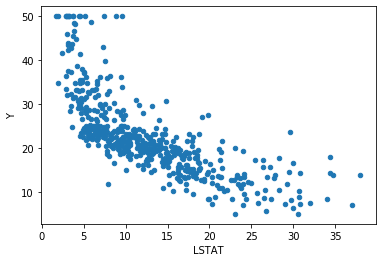

In [0]:
df.plot.scatter(x='LSTAT', y='Y')

### Q8. Apply the simple linear regression solver you implemented in Q1 to fit (LSTAT, Y), report the MSE value, and plot the fitted line over input data points.
- Do you think the linear model works well in here, i.e., do they have a linear relationship? Justify your answer using the MSE value you computed and the plot.

In [0]:
   
    #-------------------------#
    #  Your code goes here    #
    #-------------------------#
    


### Q9. Complete the following function.

In [0]:
def polynomial_transform(X, k):
    """
    This function transforms the data using polynomials.
    
    Parameters:
    ----------------    
    X: 1d array corresponding to a feature
    k: int, degree of polynomial
    
    Returns:
    ----------------
    X_trans: 2d array corresponding to the transformed data,
          each row and column correspond to an observation and a feature,
          respectively.          
    """
    if X.ndim > 1:
        raise ValueError('x should be a 1-dimensional array')    
    
    #---------------------------#
    #    Your code goes here    #
    #---------------------------#
    
    return X_tran

In [0]:
X = df['LSTAT'].values
Y = df['Y'].values

# transform
X_tran = polynomial_transform(X, 2)

### Q10. Perform linear regression on the transformed data, i.e. (X_tran, Y).
- You can use `sklearn.linear_model.LinearRegression`.
- Report the MSE and $R^2$ score (see the documentation)
- Plot the fitted line along with data.
- Draw the residual plot.
- Do you think polynomial of degree 2 better fit the data than the linear line?

In [0]:
    #-------------------------#
    #  Your code goes here    #
    #-------------------------#
    
    